Decision Treesare supervised machine learning algorithms that are used for both regression and classification tasks. Trees are powerful algorithms that can handle complex datasets.
They do not need the numerical input data to be scaled. Whatever the numerical values are, decision trees don't care. Decision trees handle categorical features in the raw text format. The results of decision trees can be interpreted. It's fair to say that decision trees are not blackbox type models. While most models will suffer from missing values, decision trees are okay with them. Trees can handle imbalanced datasets. You will only have to adjust the weights of the classes. Trees can provide the feature importances or how much each feature contributed to the model training results. Trees are the basic building blocks of ensemble methods such as random forests and gradient boosting machines.
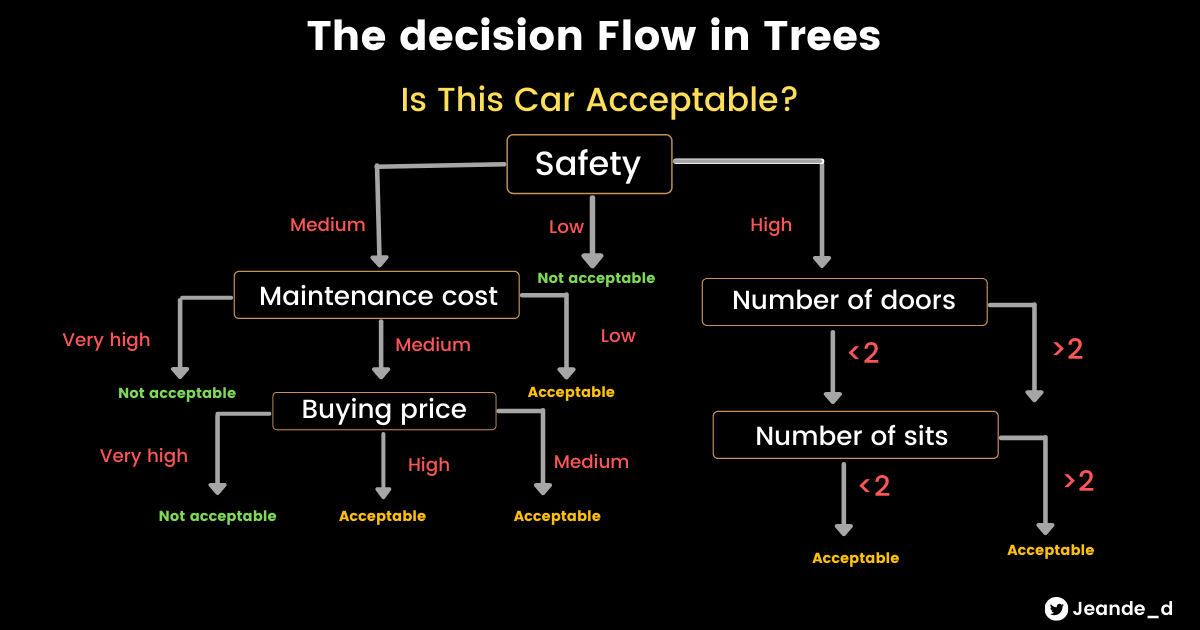


A well-known downside of decision trees is that they tend to overfit the data easily(pretty much assumed they will always overfit at first). One way to overcome overfitting is to reduce the maximum depth of the decision tree.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2)

In [8]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [10]:
# Data description 

print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [12]:
# Displaying feature names

car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [14]:
# Getting the whole dataframe

car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


Before doing exploratory analysis, let's get the training and test data.

In [17]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.1,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 1555 
The size of testing data is: 173


In [19]:
# Checking summary statistics

train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1555,1555,1555,1555,1555,1555,1555
unique,4,4,4,3,3,3,2
top,med,low,2,2,med,low,P
freq,402,392,393,521,522,528,1097


In [21]:
# Checking missing values
train_data.isnull().sum()

buying         0
maint          0
doors          0
persons        0
lug_boot       0
safety         0
binaryClass    0
dtype: int64

Categorical features that are in the dataset

In [24]:
train_data['buying'].value_counts()

buying
med      402
vhigh    387
high     385
low      381
Name: count, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

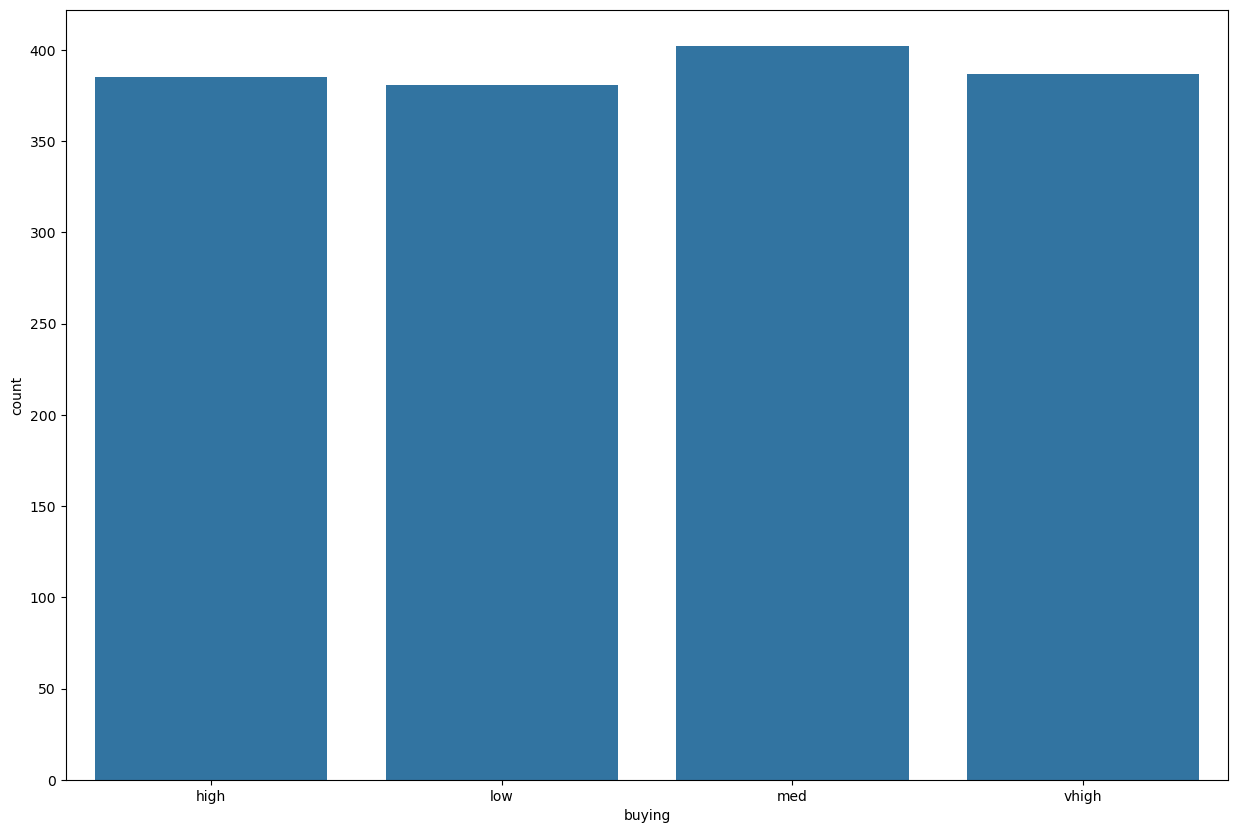

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

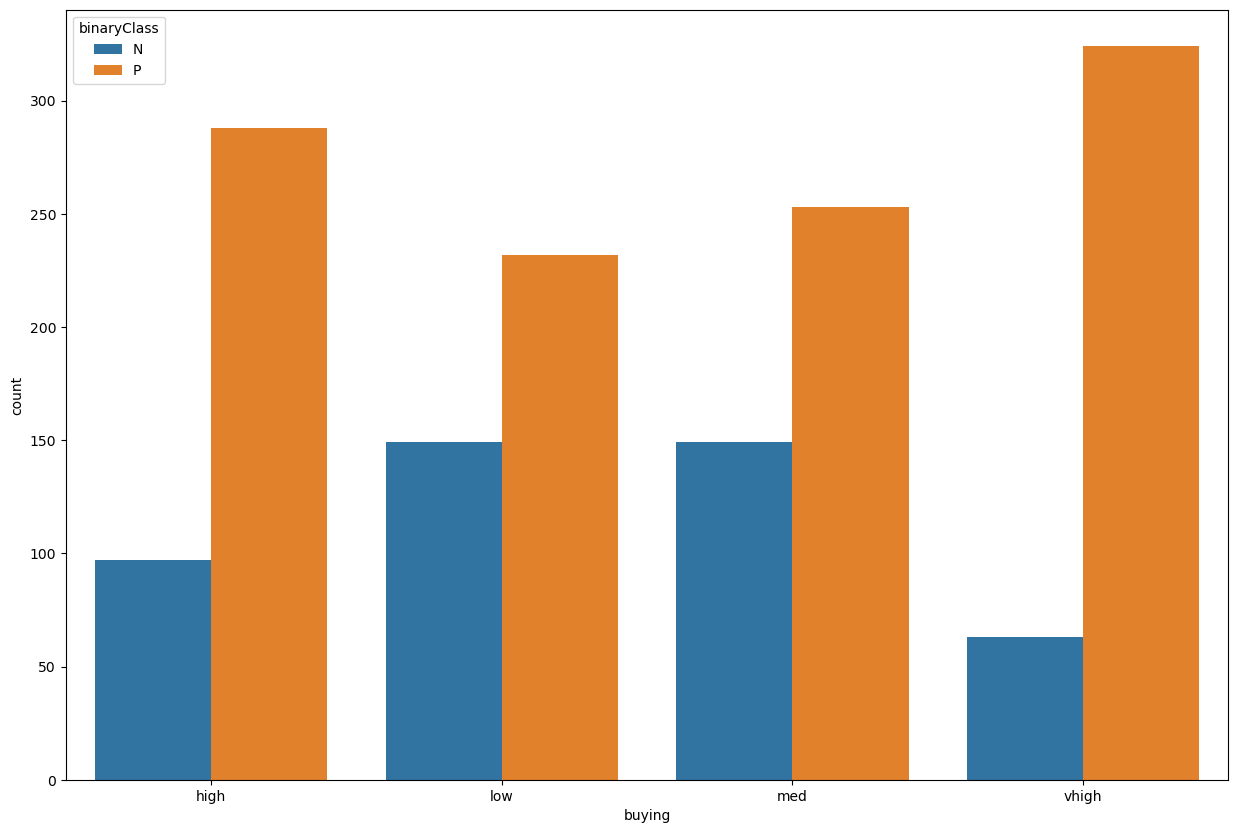

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

In [32]:
train_data['maint'].value_counts()

maint
low      392
med      390
high     387
vhigh    386
Name: count, dtype: int64

<Axes: xlabel='maint', ylabel='count'>

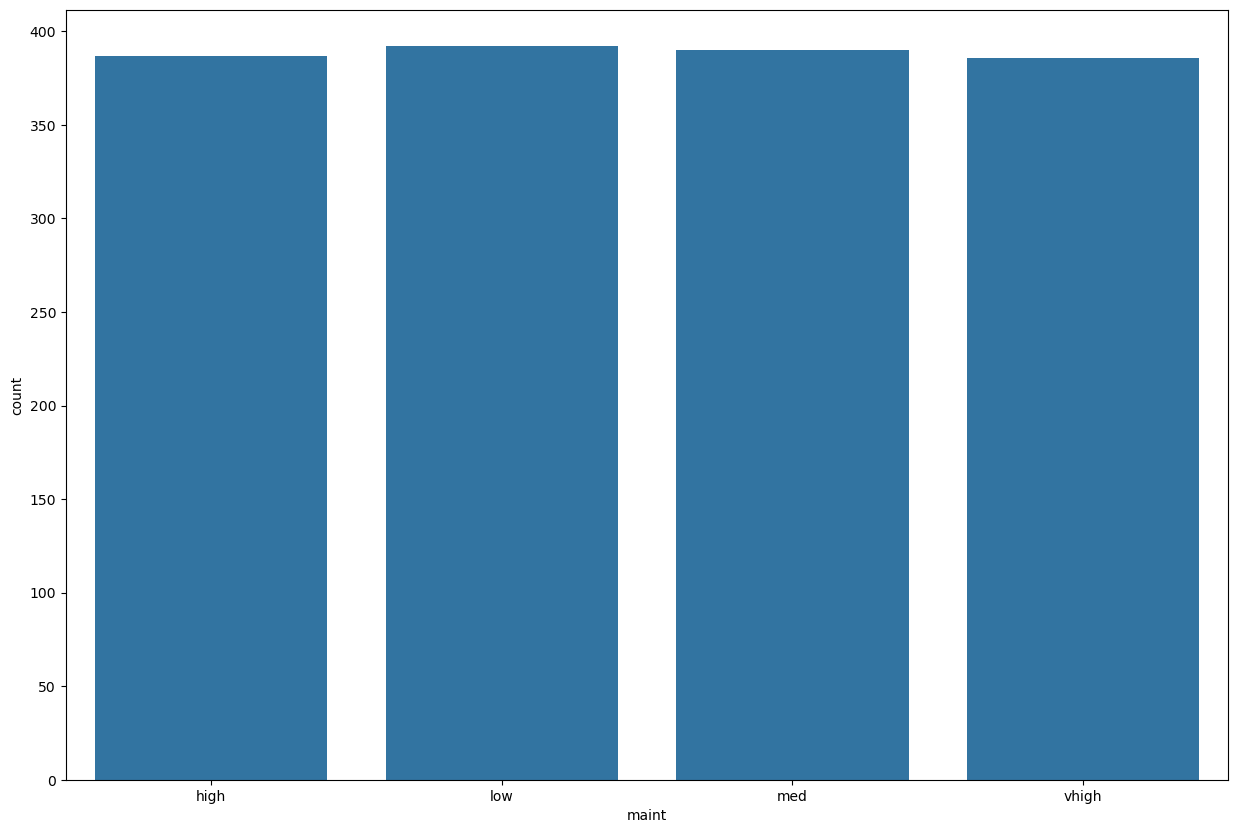

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

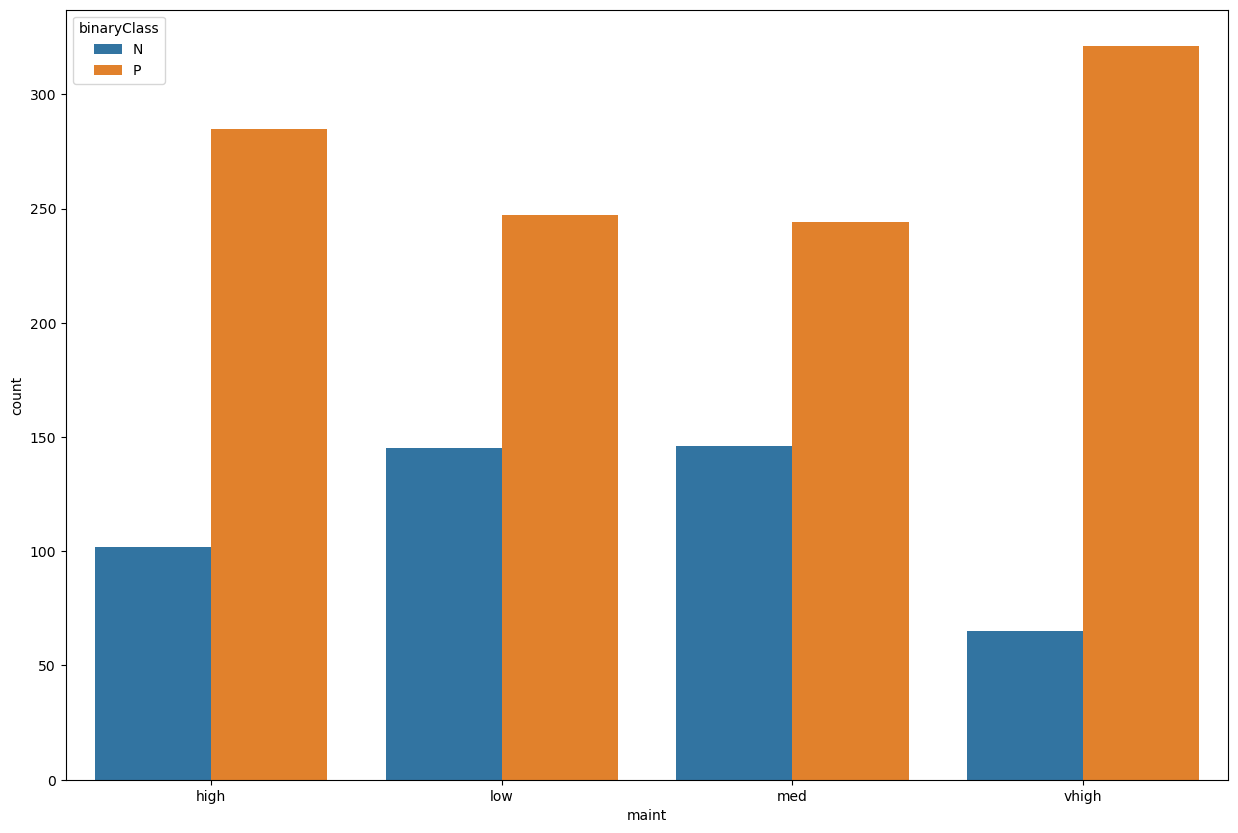

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

In [38]:
train_data['doors'].value_counts()

doors
2        393
4        393
5more    389
3        380
Name: count, dtype: int64

<Axes: xlabel='doors', ylabel='count'>

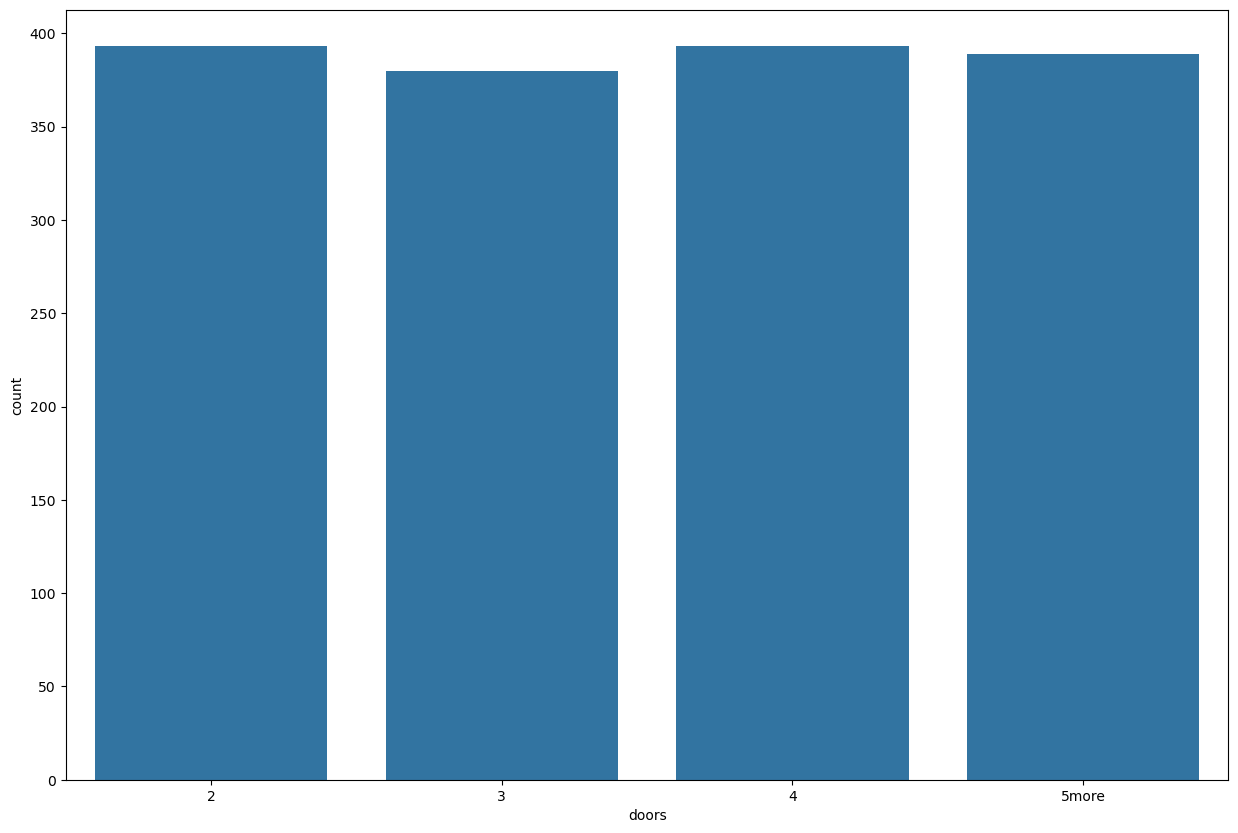

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')

<Axes: xlabel='doors', ylabel='count'>

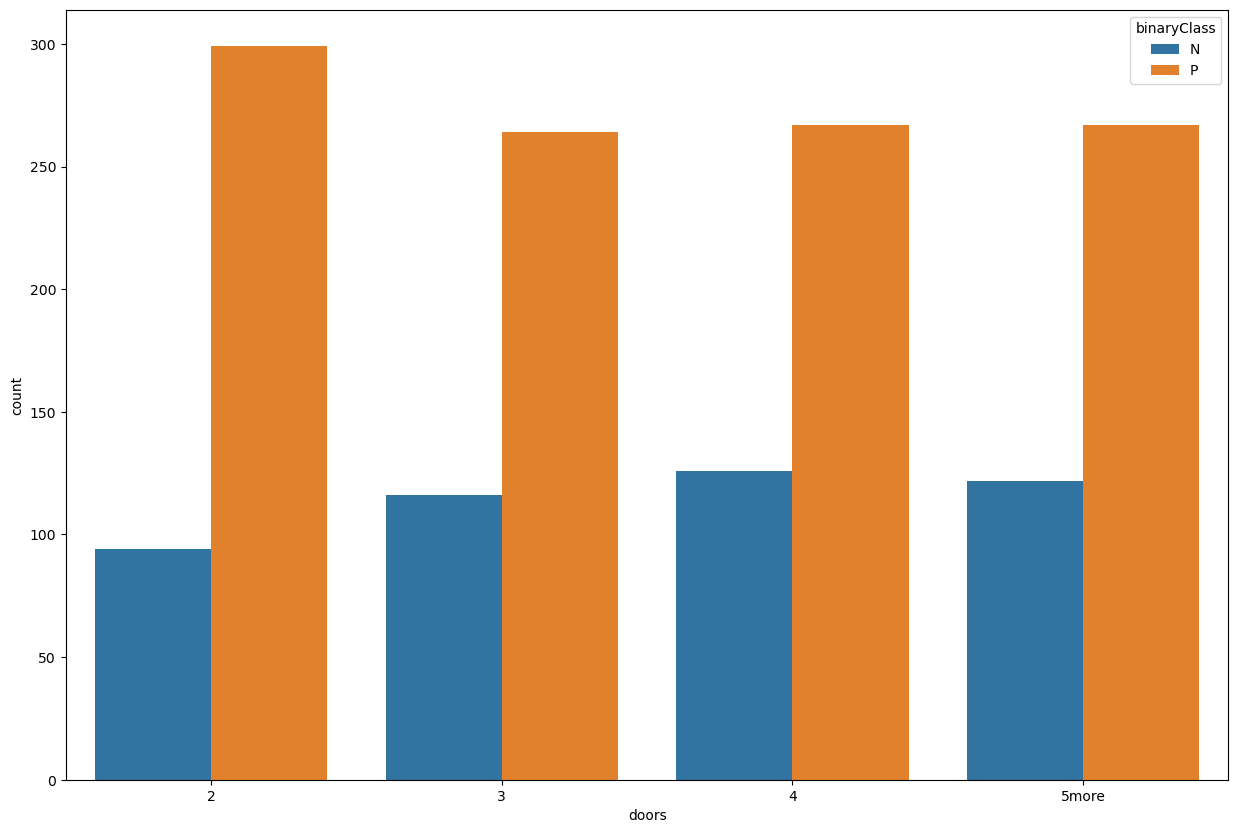

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')

In [44]:
train_data['persons'].value_counts()

persons
2       521
more    521
4       513
Name: count, dtype: int64

<Axes: xlabel='persons', ylabel='count'>

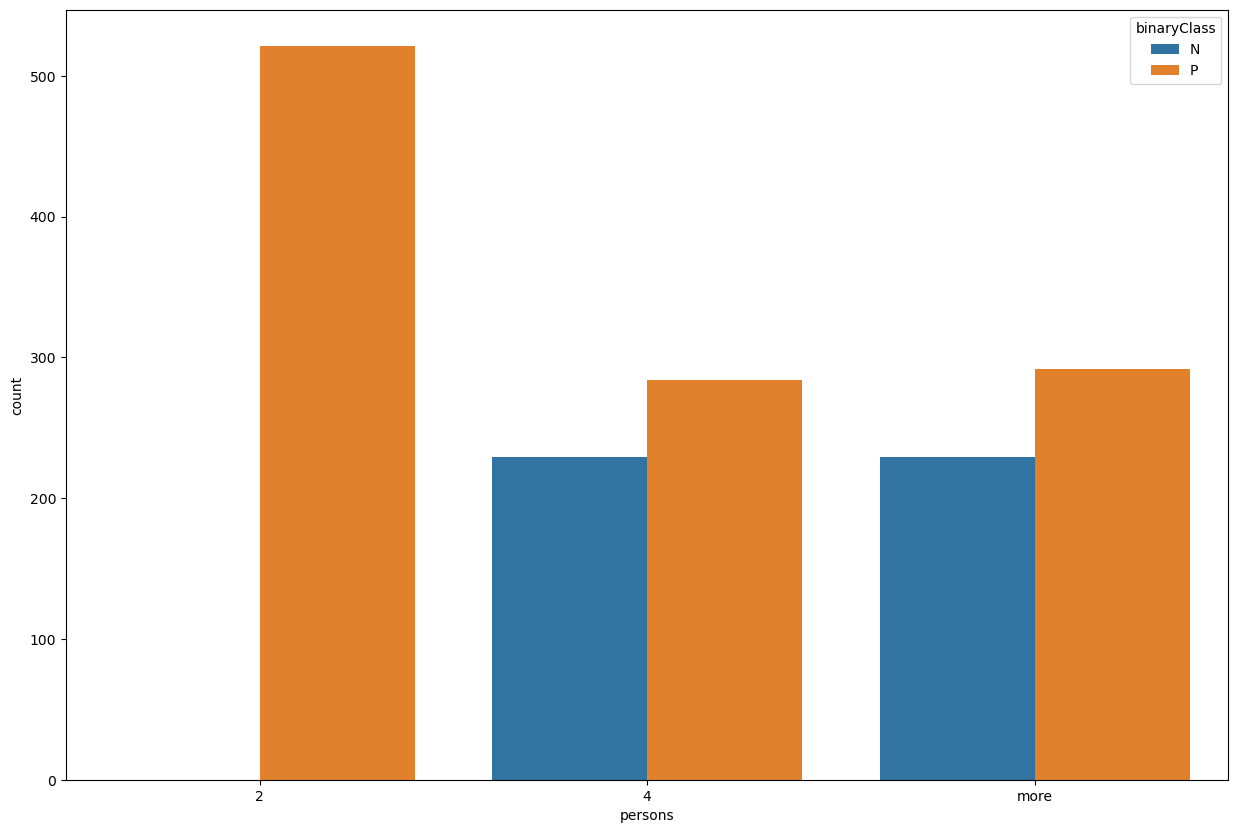

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [48]:
train_data['lug_boot'].value_counts()

lug_boot
med      522
small    517
big      516
Name: count, dtype: int64

<Axes: xlabel='lug_boot', ylabel='count'>

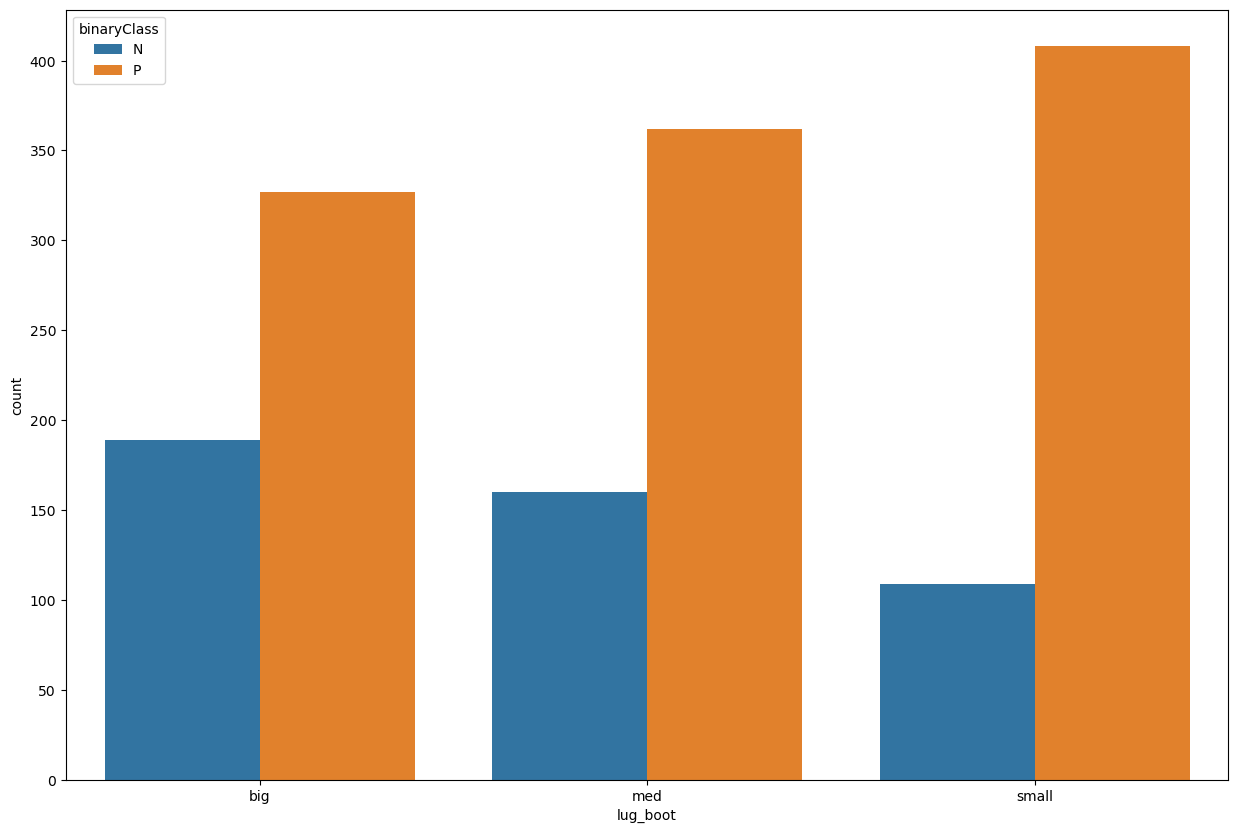

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [52]:
train_data['safety'].value_counts()

safety
low     528
high    514
med     513
Name: count, dtype: int64

<Axes: xlabel='safety', ylabel='count'>

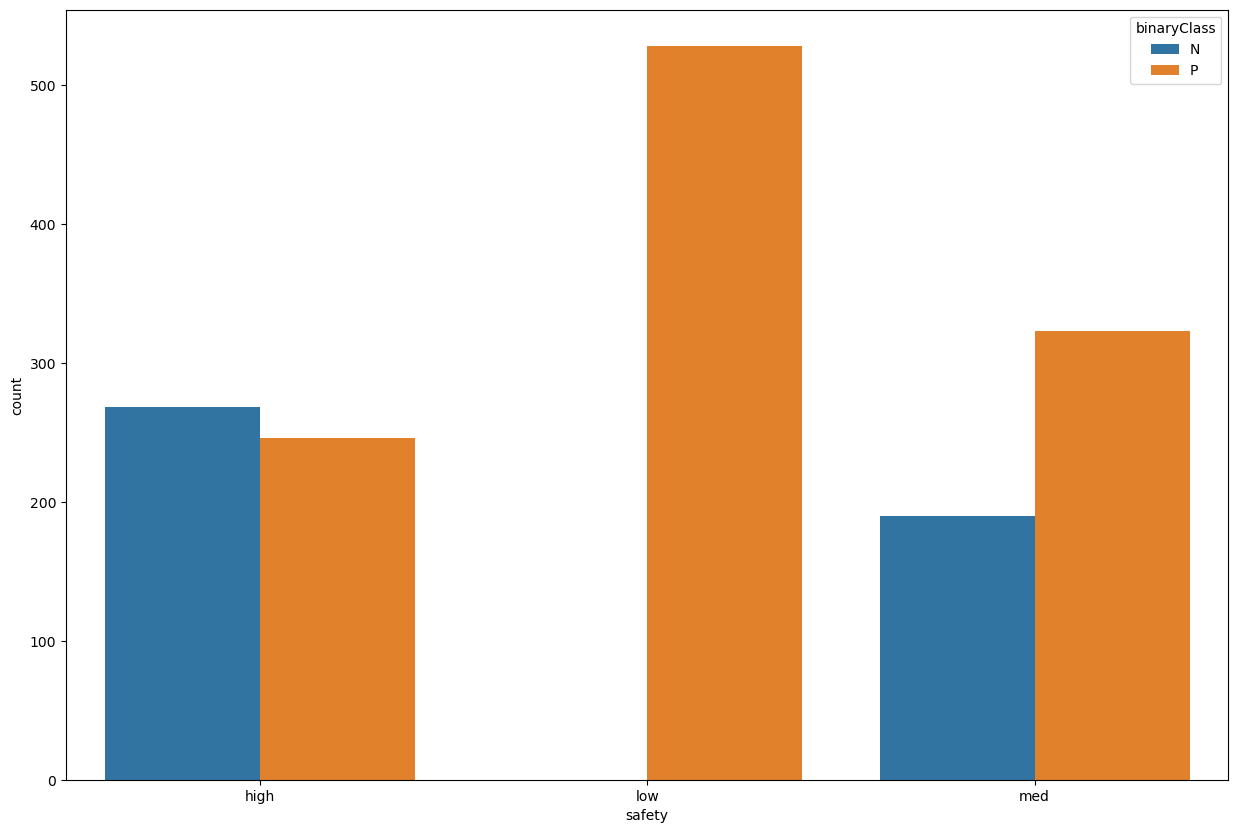

In [54]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [56]:
train_data['binaryClass'].value_counts()

binaryClass
P    1097
N     458
Name: count, dtype: int64

<Axes: xlabel='binaryClass', ylabel='count'>

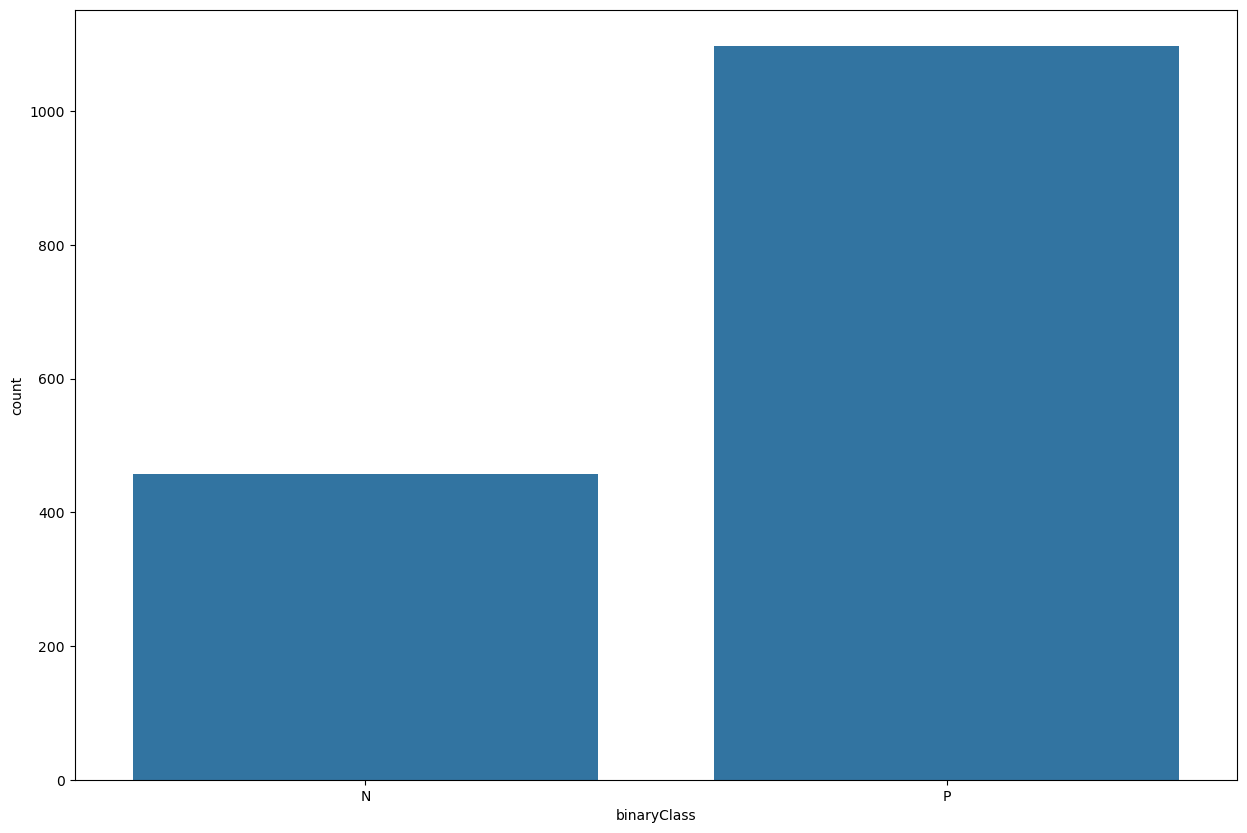

In [58]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')

Data is completely skewed/imbalanced. The positive examples are 2x more than negative examples. Accuracy is not the right metric in this case

Categorical Features

In [72]:
#Create a training input data and labels.

car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data['binaryClass']

In [74]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('ord_enc', OrdinalEncoder())
    
])

car_train_prepared = pipe.fit_transform(car_train)

In [76]:
#Convert P and N into numbers using label encoder.

from sklearn.preprocessing import LabelEncoder


label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)

Training Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

In [83]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
   
    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)
    
    return acc

In [85]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):

    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)
    
    return cm

In [87]:

from sklearn.metrics import classification_report

def class_report(input_data,model,labels):

    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)
    
    return report

In [93]:
accuracy(car_train_prepared, tree_clf, car_labels_prepared) #Overfitted by imbalanced dataset

1.0

In [95]:
conf_matrix(car_train_prepared, tree_clf, car_labels_prepared)

array([[ 458,    0],
       [   0, 1097]], dtype=int64)

In [97]:
class_report(car_train_prepared, tree_clf, car_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00      1097

    accuracy                           1.00      1555
   macro avg       1.00      1.00      1.00      1555
weighted avg       1.00      1.00      1.00      1555



Improving Decision Trees

In [100]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

One way to avoid overfitting is reduce number maximum depth of the tree, set by the hyperparameter max_depth.
Also, I set the class_weight to balanced because our dataset is imbalanced. By setting it to balanced, the model will automatically adjust the class weight based on the number of available samples in all classes.

In [103]:
# Let's hide warnings returned by grid search

import warnings
warnings.filterwarnings('ignore')

In [105]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)), 
               'min_samples_split': [0,1,2, 3, 4], 
               'min_samples_leaf': [0,1,2, 3, 4], 
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset 

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [107]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [111]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       max_leaf_nodes=5, random_state=42)

In [113]:
tree_best = grid_search.best_estimator_

In [115]:
car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

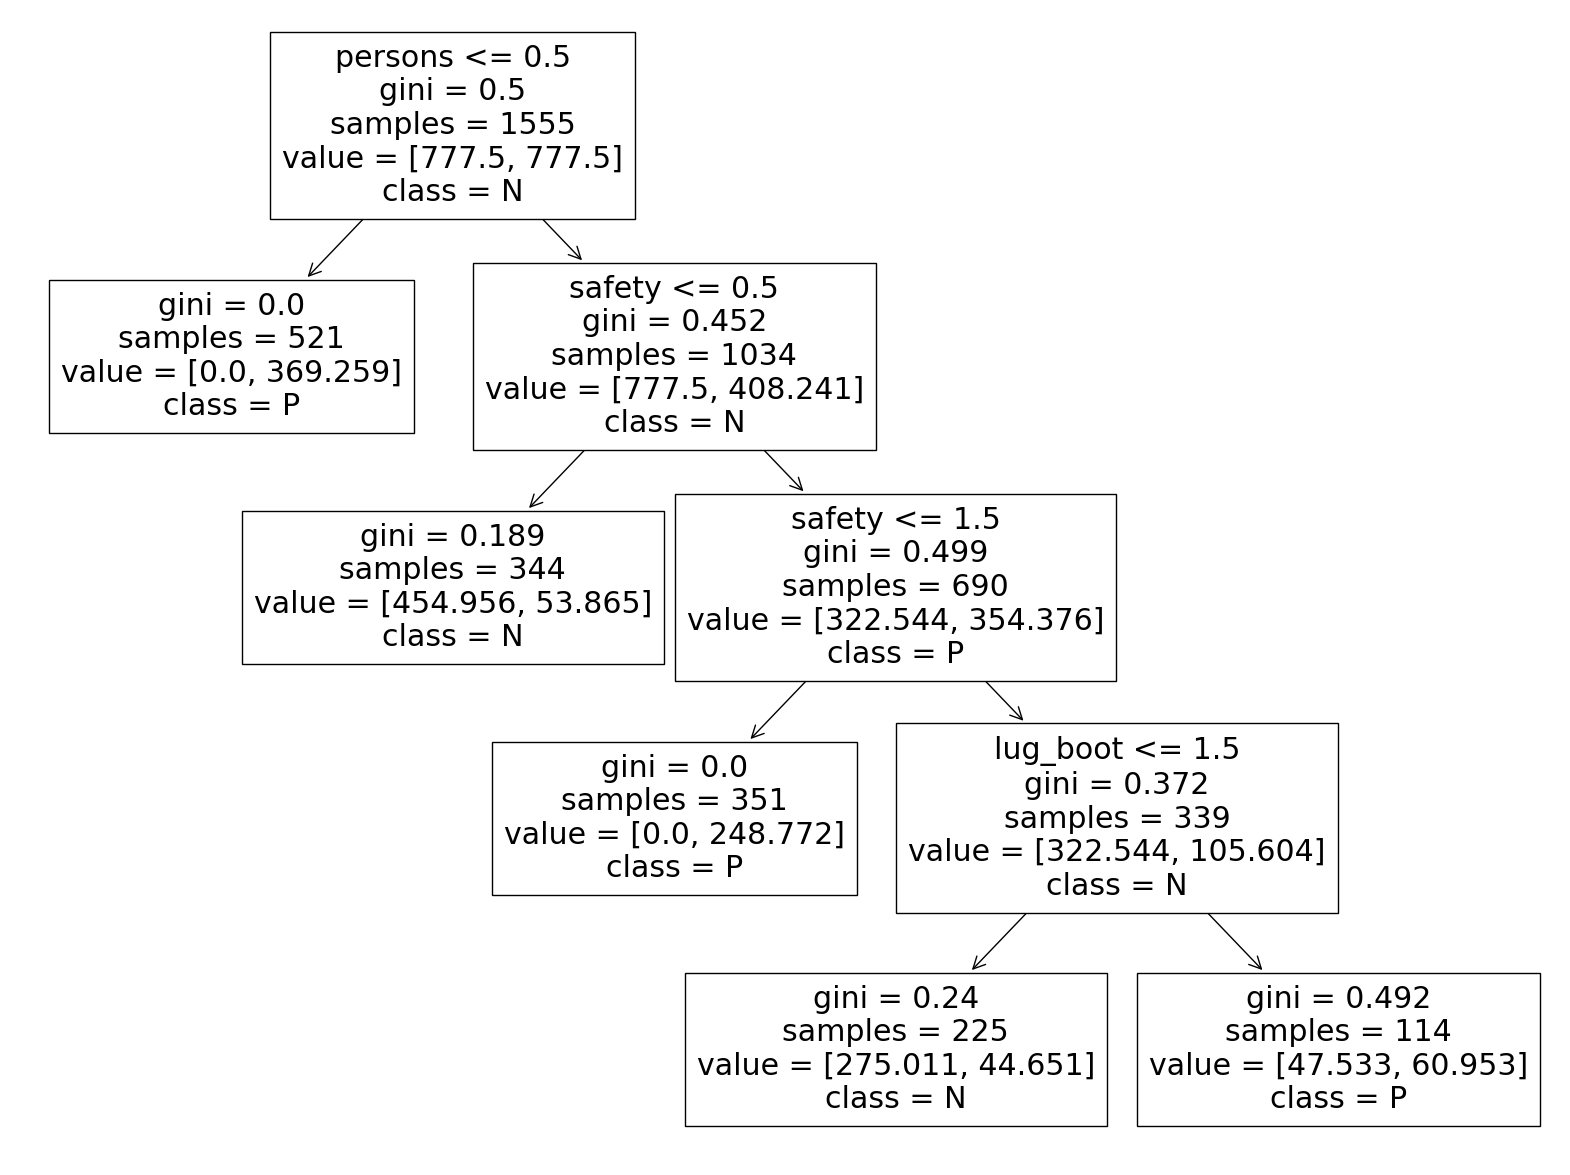

In [117]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);

In [119]:
accuracy(car_train_prepared, tree_best, car_labels_prepared)

0.8926045016077171

In [121]:
conf_matrix(car_train_prepared, tree_best, car_labels_prepared)

array([[430,  28],
       [139, 958]], dtype=int64)

In confusion matrix, each row represent an actual class and each column represents predicted class.

In [124]:
class_report(car_train_prepared, tree_best, car_labels_prepared)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       458
           1       0.97      0.87      0.92      1097

    accuracy                           0.89      1555
   macro avg       0.86      0.91      0.88      1555
weighted avg       0.91      0.89      0.90      1555



Evaluating the model on the test set

In [127]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']

In [129]:
# Handling the categorical features with the pipeline that we defined early

car_test_prepared = pipe.transform(car_test)

In [131]:
car_test_labels_prepared = label_enc.transform(car_test_labels)

In [133]:
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)

0.8554913294797688

In [135]:
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)

array([[53,  7],
       [18, 95]], dtype=int64)

In [137]:
class_report(car_test_prepared, tree_best, car_test_labels_prepared)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        60
           1       0.93      0.84      0.88       113

    accuracy                           0.86       173
   macro avg       0.84      0.86      0.85       173
weighted avg       0.87      0.86      0.86       173

